#  EDSA - Climate Change Belief Analysis 2022
## <span style="color:red"> TeamNM6 -  2201ACDS_NM6 </span>




# Introduction

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, the team will import the necessary libraries that will be used throughout analysis and modelling. |

---

In [1]:
#Natural language library
import nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords



#Other conventional libraries
import numpy as np
import pandas as pd

import html

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as score, classification_report
from sklearn.utils import resample




<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, the team will load train and test data into a DataFrame. |

---

In [2]:
#Load train data
train = pd.read_csv('train.csv')

#Load test data
test = pd.read_csv('test_with_no_labels.csv')

In [3]:
train.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [4]:
test.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

<a id="three"></a>
## 3. Data Cleaning & Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description:  ⚡ |
| :--------------------------- |
| In this section, the team will clean the dataset and perform and indepth analysis of all the variables in the DataFrame. |

---


Looking at the data, we can observe that the tweets returned contain several messy contents. 

First, we will remove the new lines probably generated during html decoding.

In [5]:
#This block of code removes \n from each tweet
 
for i in  (train['message']):
    i=i.replace('\n', '')
    i=html.unescape(i)


    

Great. Our data is free of messy snooky html inputs. However, there are some other problems!!!

Most times twitter users attach media files like images, video etc to thier tweets. Scraping this data will caused thier conversion into JSON. This can be troublesome. We need to remove them!!!

Also, we will need to clean hash characters (not hashtags); @ too...

In [6]:
#This block of code conducts further cleaning. We will be employing
#Regex for this task

for i in range (len(train['message'])):
    train['message'][i]=re.sub(r"(@[A-Za-z0-9_]+)|[^\w\s]|http\S+","",train['message'][i])
train.head()



C:\Users\USER\AppData\Local\Temp/ipykernel_9532/1671099453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['message'][i]=re.sub(r"(@[A-Za-z0-9_]+)|[^\w\s]|http\S+","",train['message'][i])


sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesnt think carbon dio...   625221
1          1  Its not like we lack evidence of anthropogenic...   126103
2          2  RT  Researchers say we have three years to act...   698562
3          1  TodayinMaker WIRED  2016 was a pivotal year in...   573736
4          1  RT  Its 2016 and a racist sexist climate chang...   466954

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

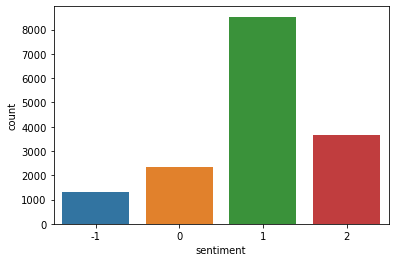

In [7]:
sns.countplot(train['sentiment'],)

In [8]:
# evaluate correlation

In [9]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section, the team will restructure the data for the project purpose... |

---

For uniformity, we change all text to lower case

In [10]:
#convert to lowercase
train['message']=train['message'].str.lower()
train.head()


sentiment                                            message  tweetid
0          1  polyscimajor epa chief doesnt think carbon dio...   625221
1          1  its not like we lack evidence of anthropogenic...   126103
2          2  rt  researchers say we have three years to act...   698562
3          1  todayinmaker wired  2016 was a pivotal year in...   573736
4          1  rt  its 2016 and a racist sexist climate chang...   466954

Alright, now thats out of the way.
The team will now perform tokenization and lemmanization. 

If we can recall,
Tokenization divides text into a sequence of 'words'. Lemmanization on the other hand, groups words of similar meaning together

### Tokenisation

In [11]:
tokeniser = TreebankWordTokenizer()
train['tweet tokens'] = train['message'] .apply(tokeniser.tokenize)

#we drop the message column
train.drop(['message'], axis=1, inplace=True)

train.head()

sentiment  tweetid                                       tweet tokens
0          1   625221  [polyscimajor, epa, chief, doesnt, think, carb...
1          1   126103  [its, not, like, we, lack, evidence, of, anthr...
2          2   698562  [rt, researchers, say, we, have, three, years,...
3          1   573736  [todayinmaker, wired, 2016, was, a, pivotal, y...
4          1   466954  [rt, its, 2016, and, a, racist, sexist, climat...

### Lemmatization

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
def lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words] 

In [14]:
train['tweet tokens'] = train['tweet tokens'].apply(lemma, args=(lemmatizer, ))

In [15]:
train.head()
# create new features

sentiment  tweetid                                       tweet tokens
0          1   625221  [polyscimajor, epa, chief, doesnt, think, carb...
1          1   126103  [it, not, like, we, lack, evidence, of, anthro...
2          2   698562  [rt, researcher, say, we, have, three, year, t...
3          1   573736  [todayinmaker, wired, 2016, wa, a, pivotal, ye...
4          1   466954  [rt, it, 2016, and, a, racist, sexist, climate...

The team would now continue down to remove stop words. 
If we would recall, Stop words are words which do not contain important significance resulting from the fact that they commonly return a vast amount of unnecessary information.

In the case of this project, we were careful to exempt 'not' from the stop words. This was to preserve context.

In [ ]:
#Remove stop wards
for i in train['tweet tokens']:
    i=[word for word in i if not word in stopwords.words('english') and word != 'not'] 

Its time to do some modelling. However from the histogram obtained earlier, we observed that the four classes had uneven sizes. This particularity can cause biased predictions. So lets even out the predictions.

In [ ]:
len(train[train['sentiment']==1])

In [ ]:
class_size=4500
resampled_classes = []

# For each label
for label in train['sentiment'].unique():
    # Get num. of observations from this class
    label_size = len(train[train['sentiment']==label])
    
    # If label_size < class size the upsample, else downsample
    if label_size < class_size:
        # Upsample
        label_data = train[train['sentiment'] == label]
        label_resampled = resample(label_data, replace=True, n_samples=class_size, random_state=27) 
    else:
        # Downsampleresampled_data = np.concatenate(resampled_classes, axis=0)
        label_data = train[train['sentiment'] == label]
        label_resampled = resample(label_data, replace=False, n_samples=class_size, random_state=27)
        
    resampled_classes.append(label_resampled)
    
train = pd.concat(resampled_classes, axis=0)
train.shape

In [ ]:
for m in resampled_classes:
    print(type(m))

For better prediction, we would need to convert the words into numbers (encode). We will use countvectorizer to achieve that.

In [ ]:

'''
from sklearn.preprocessing import MultiLabelBinarizer

count_vec = MultiLabelBinarizer()
mlb = count_vec.fit(train['tweet tokens'])
pd.DataFrame(mlb.transform(train['tweet tokens']), columns=[mlb.classes_])
'''
text = train['tweet tokens'].map(' '.join)
count_vec = CountVectorizer()
cv = count_vec.fit(text)
cn=cv.get_feature_names()
df=cv.transform(text).toarray()

#Lets have a peek at the dataset
print(pd.DataFrame((df),columns=cn).head())


Oh wow, we have over 16,000 features. That is not good for our product as it will slow down predictions massively.

We will reduce the features. We could have used countvectorizer but we want to be more purposeful than random. We wish to use the selectKBest for this. However, we will need to split the da

In [ ]:
'''
# Import the feature selector module
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

# Set up selector, choosing score function and number of features to retain
selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=1000)

# Transform (i.e.: run selection on) the training data
df = selector_kbest.fit_transform(df, train['sentiment'].values)
print(df.shape)
'''

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section,the team would design models for the classification task. |

---

For this section, wee will extract features from our dataset, then we will model fit a model to the dataset.

In [ ]:
#split dataset into train and test

X_train, X_test, y_train, y_test = tts(df, train['sentiment'].values, test_size = 0.3)

In [ ]:
# create one or more ML models
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
'''evaluate one or more ML models'''

#Model 1: Logistic regression
pred_lr = lr.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section, we will compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance
#Model 1: Logistic Regression
print(classification_report(y_test,pred_lr))

In [ ]:
#Here, the time will produce a visual performance comparison between the models used...



In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

# For Submission to Kaggle

In [ ]:
for i in range (len(test['message'])):
    test['message'][i]=test['message'][i].replace('\n', '')
    test['message'][i]=html.unescape(test['message'][i])

for i in range (len(test['message'])):
    test['message'][i]=re.sub(r"(@[A-Za-z0-9_]+)|[^\w\s]|http\S+","",test['message'][i])

test['message']=test['message'].str.lower()
tokeniser = TreebankWordTokenizer()
test['tweet tokens'] = test['message'] .apply(tokeniser.tokenize)

#we drop the message column
test.drop(['message'], axis=1, inplace=True)
test['tweet tokens'] = test['tweet tokens'].apply(lemma, args=(lemmatizer, ))

for i in test['tweet tokens']:
    i=[word for word in i if not word in stopwords.words('english') and word != 'not']
text2 = test['tweet tokens'].map(' '.join)
cv = count_vec.fit(text2)
cn2=cv.get_feature_names()
df=cv.transform(text2).toarray()
df=pd.DataFrame((df),columns=cn2)

test_df=[]
for word in cn:
    if word in cn2:
        test_df.append(df[word])
    else:
        test_df.append(pd.DataFrame(0 for i in range(df.shape[0])))
test_df=pd.concat(test_df, axis=1)
test_df=selector_kbest.transform(test_df.values)


In [ ]:
pred = lr.predict(test_df)

In [ ]:
res=pd.DataFrame(dict())
res['tweetid']=test['tweetid']
res['sentiment']=pred

print(res.head())

In [ ]:
res.to_csv('submission_TeamNM6.csv', index = False)